CRS: EPSG:4326
Transformación: | 0.00, 0.00,-64.91|
| 0.00,-0.00,-38.10|
| 0.00, 0.00, 1.00|
Dimensiones: 423 x 210
Número de bandas: 1
Valor mínimo: -9999
Valor máximo: 439
Valor medio: -2914.7030395136776
Desviación estándar: 4767.166894920328


Matplotlib is building the font cache; this may take a moment.


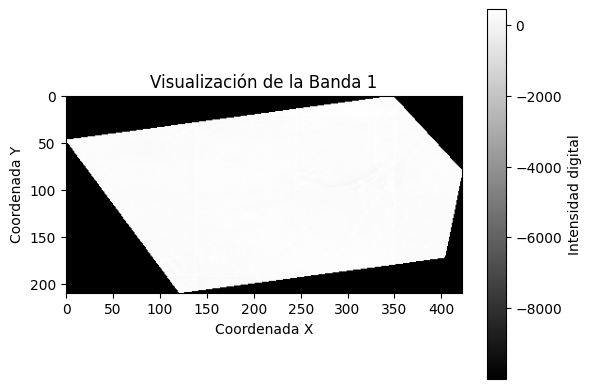

In [4]:
import rasterio

# Ruta al archivo GeoTIFF
file_path = "../HLSS30.020_B01_doy2024154_aid0001_20S.tif"

# Abrir el archivo GeoTIFF
with rasterio.open(file_path) as src:
    # Imprimir metadatos básicos del archivo
    print("CRS:", src.crs)  # Sistema de coordenadas
    print("Transformación:", src.transform)  # Transformación afín
    print("Dimensiones:", src.width, "x", src.height)  # Dimensiones en píxeles
    print("Número de bandas:", src.count)  # Número de bandas en el archivo

    # Leer la primera banda
    band1 = src.read(1)  # Leer la banda 1

    # Calcular y imprimir estadísticas básicas de la banda
    print("Valor mínimo:", band1.min())
    print("Valor máximo:", band1.max())
    print("Valor medio:", band1.mean())
    print("Desviación estándar:", band1.std())

    # Opcional: Mostrar la imagen de la banda
    import matplotlib.pyplot as plt
    plt.imshow(band1, cmap='gray')
    plt.colorbar(label='Intensidad digital')
    plt.title("Visualización de la Banda 1")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.show()



Valor mínimo (sin relleno): 11
Valor máximo (sin relleno): 439
Valor medio (sin relleno): 293.06625343451526
Desviación estándar (sin relleno): 39.792992866738565


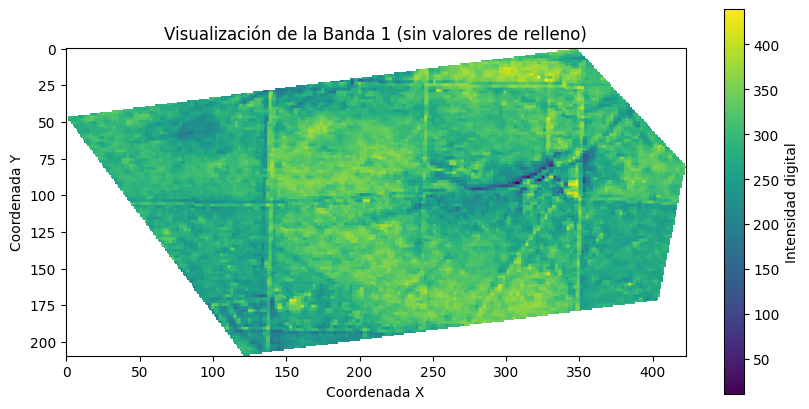

In [5]:
import numpy as np
with rasterio.open(file_path) as src:
    band1 = src.read(1)

    # Aplicar una máscara para remover valores de relleno
    masked_data = np.ma.masked_where(band1 == -9999, band1)

    print("Valor mínimo (sin relleno):", masked_data.min())
    print("Valor máximo (sin relleno):", masked_data.max())
    print("Valor medio (sin relleno):", masked_data.mean())
    print("Desviación estándar (sin relleno):", masked_data.std())

    # Visualizar los datos
    plt.figure(figsize=(10, 5))
    plt.imshow(masked_data, cmap='viridis')
    plt.colorbar(label='Intensidad digital')
    plt.title("Visualización de la Banda 1 (sin valores de relleno)")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.show()



In [8]:
import os
import sys
import json
import asyncio
# Añadir la ruta del directorio raíz del proyecto al sys.path
project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from app.external_apis.appears.auth import get_appears_token
from app.external_apis.appears.harmonized_landsat_sentinel_data import fetch_and_store_hls_data, \
    check_task_status, list_task_files, download_and_process_file

task_id = 'df8fc600-1d26-4e6e-8ca0-69b5865f041a'
import nest_asyncio
nest_asyncio.apply()

# Ahora puedes usar asyncio.run() sin el error de bucle en ejecución
async def main():
    files = await list_task_files(task_id=task_id, token='l0Eh6S3e6Vl4lrnwFfE9F-5_vG5fA2iSTJKqiycTGi_ZDd97h8RXuiwJldIM2WTLCNfyzSNnF1LHHE4zf0shSg')
    print(f"Files: {json.dumps(files, indent=2)}")

asyncio.run(main())

2024-06-22 17:28:52,863 - INFO - Listando archivos para la tarea con ID: df8fc600-1d26-4e6e-8ca0-69b5865f041a
2024-06-22 17:28:53,841 - INFO - Archivos encontrados para la tarea df8fc600-1d26-4e6e-8ca0-69b5865f041a: 183 archivos listados
2024-06-22 17:28:53,842 - INFO - Archivos: [{'sha256': '4f713c09f2c4089c4a74c46a08550b9a185575f712dc8a2201bc709aba4a0fa7', 'file_id': '69410bcd-6e82-48aa-bdfc-c451f39fc02b', 'file_name': 'HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024149_aid0001_20S.tif', 'file_size': 2250, 'file_type': 'tif', 's3_url': 's3://appeears-output/df8fc600-1d26-4e6e-8ca0-69b5865f041a/HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024149_aid0001_20S.tif'}, {'sha256': 'a708be3f6c54241be36aaa97ec2fa396231fa79c5ece0d76a174c0763881648d', 'file_id': 'd552c03c-53b3-4ca9-a911-838362d5c8bd', 'file_name': 'HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024152_aid0001_20S.tif', 'file_size': 2250, 'file_type': 'tif', 's3_url': 's3://appeears-output/df8fc600-1d26-4e6e-8ca0-69b5

Files: [
  {
    "sha256": "4f713c09f2c4089c4a74c46a08550b9a185575f712dc8a2201bc709aba4a0fa7",
    "file_id": "69410bcd-6e82-48aa-bdfc-c451f39fc02b",
    "file_name": "HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024149_aid0001_20S.tif",
    "file_size": 2250,
    "file_type": "tif",
    "s3_url": "s3://appeears-output/df8fc600-1d26-4e6e-8ca0-69b5865f041a/HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024149_aid0001_20S.tif"
  },
  {
    "sha256": "a708be3f6c54241be36aaa97ec2fa396231fa79c5ece0d76a174c0763881648d",
    "file_id": "d552c03c-53b3-4ca9-a911-838362d5c8bd",
    "file_name": "HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024152_aid0001_20S.tif",
    "file_size": 2250,
    "file_type": "tif",
    "s3_url": "s3://appeears-output/df8fc600-1d26-4e6e-8ca0-69b5865f041a/HLSS30.020_2024144_to_2024174/HLSS30.020_B01_doy2024152_aid0001_20S.tif"
  },
  {
    "sha256": "230d3b3735051d641c3ac9671077f9e01275c07fcd1064544a9e2f0b803d2869",
    "file_id": "7ffd794f-85cc-421b-8ac1-822

In [ ]:
# Iniciando la recuperación de datos para el lugar ID: 1
# Iniciando la DB: <sqlalchemy.orm.session.AsyncSession object at 0x10c4b3410>

for file_info in files:
    file_url = file_info['s3_url']
    logger.info(f"Procesando archivo: {file_info['file_name']} desde {file_url}")
    await download_and_process_file(file_url=file_url, file_name=file_info['file_name'], place_id=1, db=db)